In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 


data=pd.read_csv("GercekZamanliTuketim-01012016-01122020.csv", encoding ="ISO-8859-1")
data=data.apply(lambda x: x.str.replace('.',''))
data=data.apply(lambda x: x.str.replace(',','.'))
data['Tüketim Miktarý (MWh)'] = data['Tüketim Miktarý (MWh)'].astype(float)
data.insert(0,'Index',range(0,len(data)))
data

,Index,Tarih,Saat,Tüketim Miktarý (MWh)
0,0,01012016,0:00,26277.24
1,1,01012016,1:00,24991.82
2,2,01012016,2:00,23532.61
3,3,01012016,3:00,22464.78
4,4,01012016,4:00,22002.91
...,...,...,...,...
43123,43123,01122020,19:00,40720.16
43124,43124,01122020,20:00,39195.74
43125,43125,01122020,21:00,38310.79
43126,43126,01122020,22:00,37173.97


I read the Electricity consumption data from 1st of January, 2016 till the 1st of December, 2020.

In [10]:
test_data=data.iloc[42384:,:]
print(test_data)
y_test=test_data['Tüketim Miktarý (MWh)'].to_numpy()
y_test

       Index     Tarih   Saat  Tüketim Miktarý (MWh)
42384  42384  01112020   0:00               28701.62
42385  42385  01112020   1:00               27254.15
42386  42386  01112020   2:00               26078.57
42387  42387  01112020   3:00               25449.47
42388  42388  01112020   4:00               25324.01
...      ...       ...    ...                    ...
43123  43123  01122020  19:00               40720.16
43124  43124  01122020  20:00               39195.74
43125  43125  01122020  21:00               38310.79
43126  43126  01122020  22:00               37173.97
43127  43127  01122020  23:00               35725.46

[744 rows x 4 columns]


array([28701.62, 27254.15, 26078.57, 25449.47, 25324.01, 25175.11,
       25318.85, 24413.95, 24543.88, 25313.99, 26118.58, 26740.86,
       26591.08, 27233.19, 27785.71, 28210.84, 29067.08, 30790.72,
       32946.87, 32956.6 , 32385.78, 31581.64, 30837.27, 29743.71,
       27931.36, 26891.54, 25998.67, 25374.78, 25145.69, 25529.95,
       26497.51, 27939.62, 32244.73, 34128.79, 34530.73, 34792.4 ,
       33256.31, 33967.69, 35239.46, 35526.07, 36552.09, 37959.05,
       38720.5 , 37718.1 , 36872.26, 35834.28, 34616.98, 33151.95,
       31301.07, 29875.22, 28908.73, 28211.  , 28054.92, 28199.32,
       29044.15, 29957.26, 33415.53, 34985.68, 35251.33, 35451.9 ,
       34191.43, 35387.31, 36868.67, 36997.12, 38021.9 , 39038.66,
       39314.53, 38256.09, 37282.36, 36150.19, 34793.99, 33281.76,
       31278.36, 29818.62, 28784.91, 28117.57, 27905.46, 28226.5 ,
       28966.82, 29817.81, 34004.19, 36566.7 , 36953.41, 37624.94,
       36237.72, 37090.66, 37947.51, 37981.78, 38329.9 , 39271

Then, I splitted the data into test and train data. The test period includes the dates after 1st of November, 2020 (included).

In [11]:
##Lag_168
lag_values=test_data['Index']-168
lag_168_prediction=data[data['Index'].isin(lag_values)]['Tüketim Miktarý (MWh)']
lag_168_prediction=lag_168_prediction.to_numpy()
Lag_168_error=np.abs((y_test - lag_168_prediction)/y_test)*100

##Lag_48
lag_values=test_data['Index']-48
lag_48_prediction=data[data['Index'].isin(lag_values)]['Tüketim Miktarý (MWh)']
lag_48_prediction=lag_48_prediction.to_numpy()
Lag_48_error=np.abs((y_test - lag_48_prediction)/y_test)*100

For this part, I was willing to use 168 and 48 hours ago consumption values to predict next day’s consumption. So, I calculated lag_168 and lag_48 values for each observation in the test data.

In [12]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

result1=MAPE(y_test,lag_168_prediction)
result2=MAPE(y_test,lag_48_prediction)

print("MAPE for lag_168: ",result1)
print("MAPE for lag_48: ",result2)

MAPE for lag_168:  3.449188482612284
MAPE for lag_48:  8.060314509077509


In this part, to predict consumption values of 1st of November, 2020 I used 25th October, 2020's consumption values. After that, I calculated MAPE values for lag_168 and lag_48 predictions on the test data.

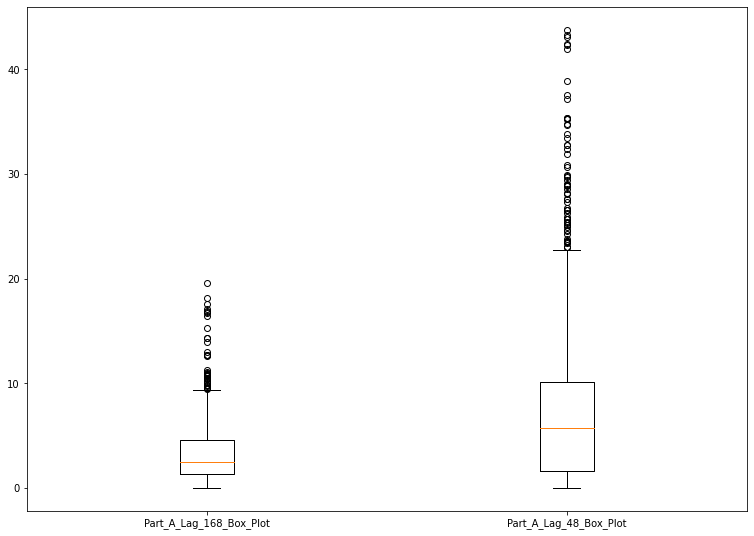

In [13]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
data=[Lag_168_error,Lag_48_error]
bp = ax.boxplot(data)
ax.set_xticklabels(['Part_A_Lag_168_Box_Plot', 'Part_A_Lag_48_Box_Plot']) 
plt.show() 

Then I plotted boxplot of Mape values for each approach. It is known that daily and hourly seasonalities are very important in this type of prediction task. Therefore, I was expecting that using the last week’s same day and same hour consumption as primary predictor would give better results compared to using 48 hours ago consumption values. When this inside is checked by looking at the boxplots, we can basically say that this intuition is true since the mean of mape values for lag_168 is smaller than the mean of lag_48 predictions.